# Spacy for NLP
spacy is open source library for nlp. It has in-built support for Object-oriented programming and is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

In [1]:
! python -m spacy download en_core_web_sm
  

import spacy

#loading the english language small model of spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
doc = nlp("spacy is open source library for nlp. It has in-built support for Object-oriented programming")


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Steps in a Spacy Pipeline

In [2]:
print()
print(type(doc)) 
print("NLP pipelines")
print(nlp.pipe_names)
#To disable the pipeline steps if needed: nlp.disable_pipes('tagger', 'parser')


<class 'spacy.tokens.doc.Doc'>
NLP pipelines
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


# Explain Spacy Positions

In [3]:
pos_list = [token.pos_ for token in doc]
for pos in set(pos_list):
  print(pos, "->", spacy.explain(pos))

AUX -> auxiliary
ADV -> adverb
ADJ -> adjective
PRON -> pronoun
VERB -> verb
PROPN -> proper noun
NOUN -> noun
PUNCT -> punctuation
ADP -> adposition


# Identifying Position and Dependency Parsing

In [4]:
import pandas as pd
print("Each word in the sentence is represented by the parts of the speech")
result = pd.DataFrame(columns = ['Text', 'Pos', 'Dep','Tag'])
for token in doc:
    result.append(
        {'Text' : token.text,
          'Pos' :  token.pos_,
          'Dep' :  token.dep_,
          'Tag' :  token.tag_
        }, ignore_index = True)
    print(token.text, "-->", token.pos_ , "-->",  token.dep_, "-->",  token.tag_)
result.head()

Each word in the sentence is represented by the parts of the speech
spacy --> NOUN --> nsubj --> NN
is --> AUX --> ROOT --> VBZ
open --> ADJ --> amod --> JJ
source --> NOUN --> compound --> NN
library --> NOUN --> attr --> NN
for --> ADP --> prep --> IN
nlp --> PROPN --> pobj --> NNP
. --> PUNCT --> punct --> .
It --> PRON --> nsubj --> PRP
has --> VERB --> ROOT --> VBZ
in --> ADV --> advmod --> RB
- --> PUNCT --> punct --> HYPH
built --> VERB --> amod --> VBN
support --> NOUN --> dobj --> NN
for --> ADP --> prep --> IN
Object --> NOUN --> npadvmod --> NN
- --> PUNCT --> punct --> HYPH
oriented --> VERB --> amod --> VBN
programming --> NOUN --> pobj --> NN


,Text,Pos,Dep,Tag


# Identifying the noun chunks and words



In [5]:
# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Noun phrases: ['spacy', 'open source library', 'nlp', 'It', 'in-built support', 'Object-oriented programming']
Verbs: ['have', 'build', 'orient']


# Named Entity Recognition

In [6]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Object ORG


# Accessing Sentences and words


In [7]:
print("There is an in-built property that contains all the sentences in the given text")
corpus = []
for sent in doc.sents:
    for word in sent:
      if not word.is_stop and not word.is_punct:
        print(word, "-->", word.lemma_)
        corpus.append(word.lemma_)

There is an in-built property that contains all the sentences in the given text
spacy --> spacy
open --> open
source --> source
library --> library
nlp --> nlp
built --> build
support --> support
Object --> object
oriented --> orient
programming --> programming


# Gather the frequency of words

In [8]:
from collections import Counter        
word_freq = Counter(corpus)
print(word_freq)

# 5 commonly occurring words with their frequencies
print()
print("Frequently used words - 5 count")
common_words = word_freq.most_common(5)
print (common_words)

# Unique words
print()
print("Unique Word Count")
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)


Counter({'spacy': 1, 'open': 1, 'source': 1, 'library': 1, 'nlp': 1, 'build': 1, 'support': 1, 'object': 1, 'orient': 1, 'programming': 1})

Frequently used words - 5 count
[('spacy', 1), ('open', 1), ('source', 1), ('library', 1), ('nlp', 1)]

Unique Word Count
['spacy', 'open', 'source', 'library', 'nlp', 'build', 'support', 'object', 'orient', 'programming']


# displaCy
spaCy comes with a built-in visualizer called displaCy. You can use it to visualize a dependency parse or named entities in a browser 

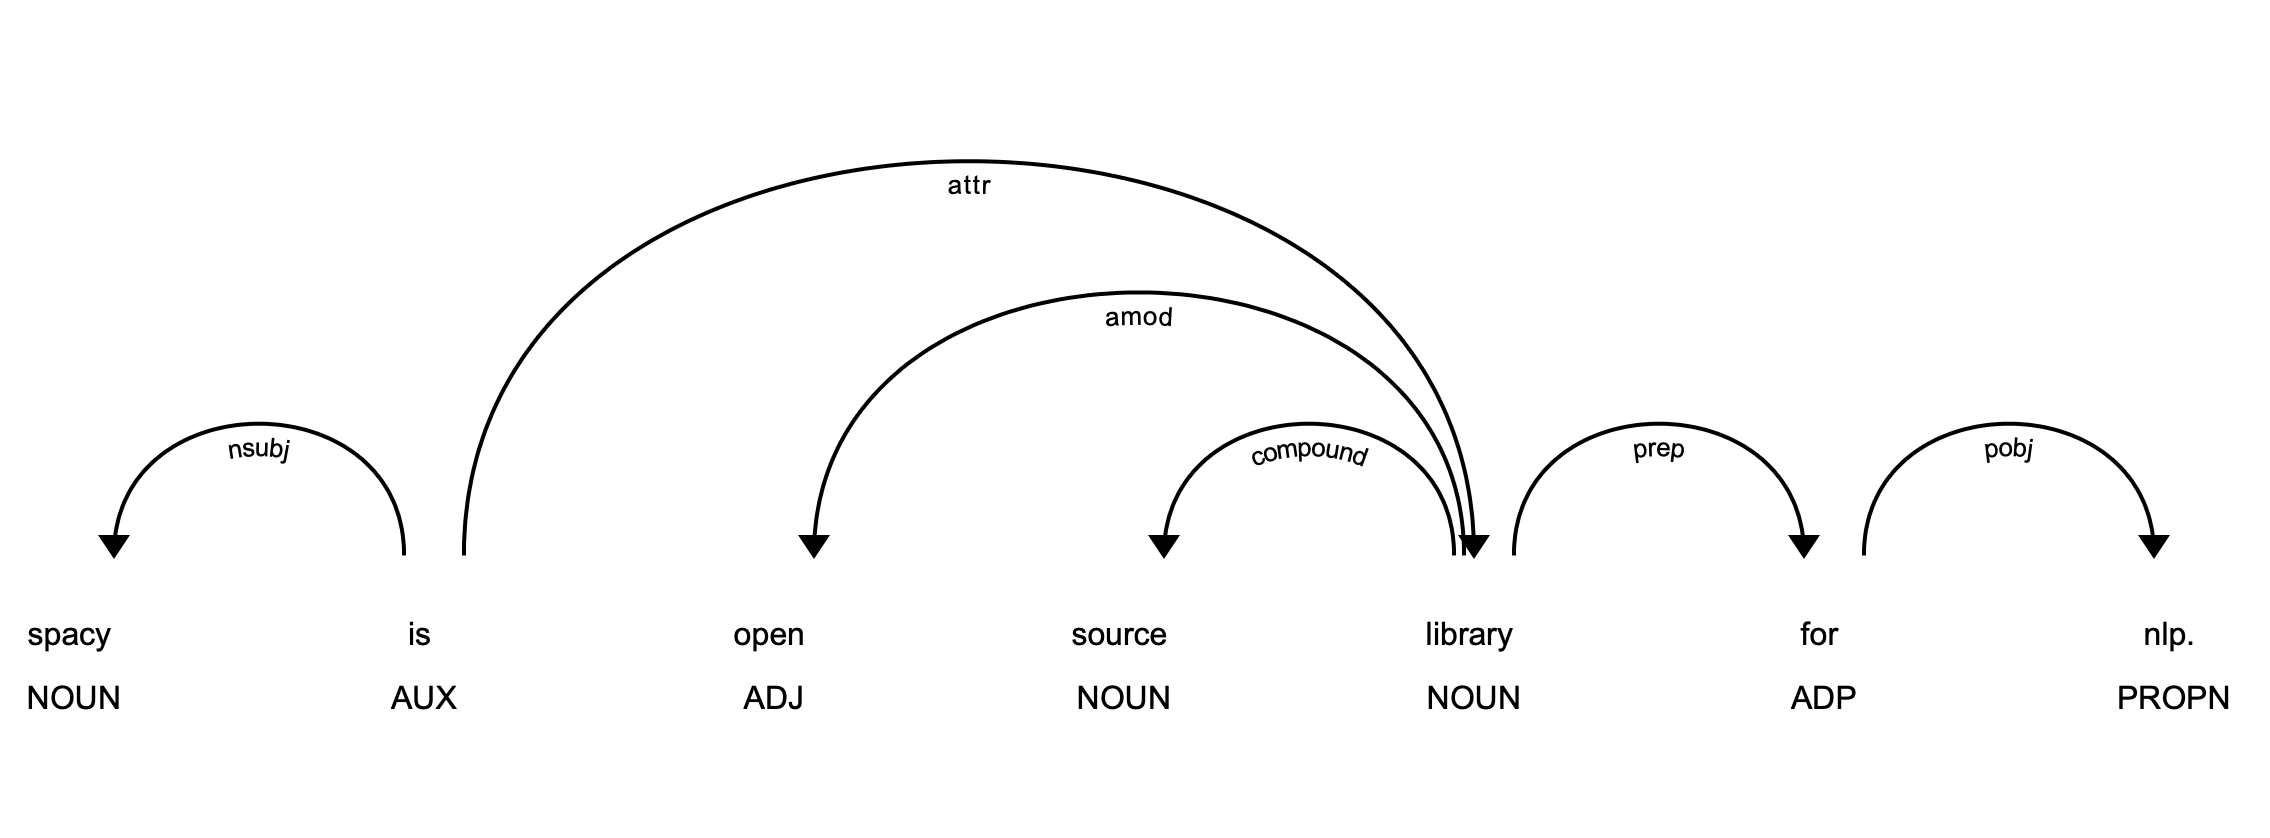


In [ ]:
from spacy import displacy
displacy.serve(doc, style='dep')

/Users/surekha/opt/anaconda3/envs/DAAN570/lib/python3.7/site-packages/spacy/displacy/__init__.py:98: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [06/Jul/2022 12:28:28] "GET / HTTP/1.1" 200 12845
127.0.0.1 - - [06/Jul/2022 12:28:28] "GET /favicon.ico HTTP/1.1" 200 12845
